# Random Forest Models

In [1]:
import pandas as pd
from numpy import asarray
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Part 1: Time Series Prediction

## Model 1: Basic Random Forest

Here I will implement a random forest model using only the previous trial partner decision and the child's aggressiveness to predict the next child decision. I will then improve upon this basic model by using multiple previous trials to predict the next decision.

### Load and format data

In [52]:
# Read data and drop columns
df = pd.read_csv("Blake_RPD_Dataset-1_Twins-03-19-21.csv")

# drop characteristics besides besides child reported aggression
dropCols = [i for i in range(22) if i !=  14]
df.drop(df.columns[dropCols],axis=1,inplace=True)

# drop decision time
dropCols2 = [i for i in range(2,df.shape[1]) if i%2 == 0]
df.drop(df.columns[dropCols2],axis=1,inplace=True)

# replace NaNs and empty
nan_value = float("NaN")
df.replace(" ", nan_value, inplace=True)
df = df.dropna()

In [8]:
time_series = []

for i in range(len(df)):
    df_row = df.iloc[i]
    agg = df_row[0]
    for j in range(2,df.shape[1]):
        new_row = []
        new_row.append(agg)
        if df_row[j-1][1] == 'C':
            new_row.append(1)
        else:
            new_row.append(0)
        if df_row[j][0] == 'C':
            new_row.append(1)
        else:
            new_row.append(0)

        time_series.append(new_row)


print(time_series[:20])


[[18.0, 1, 1], [18.0, 0, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 0, 0], [18.0, 1, 1], [18.0, 1, 1], [18.0, 1, 1], [18.0, 0, 0], [18.0, 1, 0], [18.0, 1, 0], [18.0, 1, 1]]


In [9]:
# create dataframe from list
dft = pd.DataFrame(time_series, columns =['Agg', 'X', 'y'])

In [10]:
# split into X and y
X = dft.iloc[:, 0:2].values
y = dft.iloc[:, 2].values

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Train and show results

In [44]:
model1 = RandomForestRegressor(n_estimators=50, random_state=0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(model1.score(X_train, y_train))

0.20372343880517896


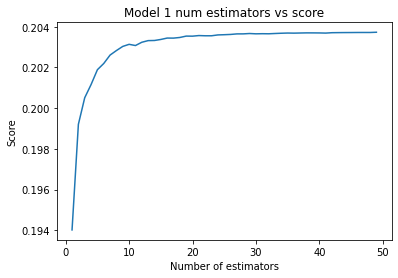

In [28]:
# train on different number of estimators and compare the scores
num_estimators = [i for i in range(1,50)]

scores = []

for i in num_estimators:
    temp_model = RandomForestRegressor(n_estimators=i, random_state=0)
    temp_model.fit(X_train, y_train)
    scores.append(temp_model.score(X_train, y_train))

plt.plot(num_estimators,scores)
plt.title("Model 1 num estimators vs score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.show()


In [13]:
print(y_pred[:20])

[0.57631035 0.47230175 0.2516937  0.4984416  0.73811972 0.2516937
 0.246501   0.30786501 0.7990689  0.2516937  0.21258762 0.26497107
 0.21258762 0.59936171 0.21258762 0.7533518  0.4984416  0.57918987
 0.57631035 0.67054776]


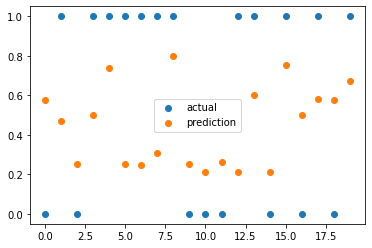

In [14]:
index = [i for i in range(20)]
plt.scatter(index,y_test[:20],label='actual')
plt.scatter(index,y_pred[:20],label='prediction')
plt.legend()
plt.show()

## Model 2: Random Forest with Longer Memory

This model will use the aggressiveness and 3 previous partner decisions to predict the child decision

In [15]:
time_series2 = []

for i in range(len(df)):
    df_row = df.iloc[i]
    agg = df_row[0]
    for j in range(4,df.shape[1]):
        new_row = []
        new_row.append(agg)
        for k in range(3,0,-1):
            if df_row[j-k][1] == 'C':
                new_row.append(1)
            else:
                new_row.append(0)
                
        if df_row[j][0] == 'C':
            new_row.append(1)
        else:
            new_row.append(0)

        time_series2.append(new_row)


print(time_series2[:20])

[[18.0, 1, 0, 1, 1], [18.0, 0, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 0, 0], [18.0, 1, 0, 1, 1], [18.0, 0, 1, 1, 1], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 0, 0], [18.0, 1, 0, 1, 0], [18.0, 0, 1, 1, 0], [18.0, 1, 1, 1, 1], [18.0, 1, 1, 0, 0], [18.0, 1, 0, 0, 0]]


In [17]:
# create dataframe from list
dft2 = pd.DataFrame(time_series2, columns =['Agg', 'X1', 'X2', 'X3', 'y'])

In [18]:
# split into X and y
X2 = dft2.iloc[:, 0:4].values
y2 = dft2.iloc[:, 4].values

# split train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1) 

In [47]:
model2 = RandomForestRegressor(n_estimators=50, random_state=0)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
print(model2.score(X_train2, y_train2))

0.32398099234825517


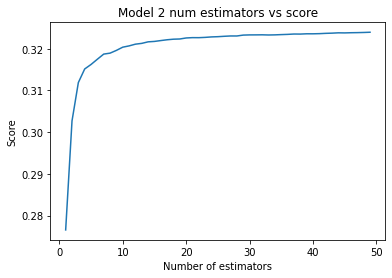

In [30]:
# train on different number of estimators and compare the scores
num_estimators = [i for i in range(1,50)]

scores = []

for i in num_estimators:
    temp_model = RandomForestRegressor(n_estimators=i, random_state=0)
    temp_model.fit(X_train2, y_train2)
    scores.append(temp_model.score(X_train2, y_train2))

plt.plot(num_estimators,scores)
plt.title("Model 2 num estimators vs score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.show()

In [20]:
print(y_pred2[:20])

[0.         0.16980108 0.36531504 0.1370406  0.57801188 0.34853144
 0.31219725 0.11949546 0.39123474 0.08752979 0.19460061 0.58026632
 0.90861034 0.94961384 0.45046616 0.81290632 0.57479344 0.80244755
 0.19487362 0.2575541 ]


In [21]:
print(X_test2)

[[28.  0.  0.  0.]
 [32.  1.  0.  0.]
 [33.  0.  1.  1.]
 ...
 [24.  0.  0.  0.]
 [26.  0.  1.  0.]
 [15.  0.  1.  0.]]


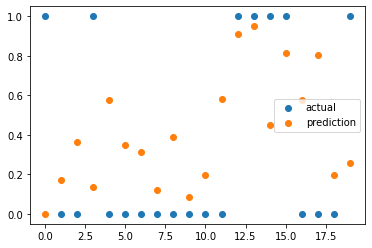

In [22]:
plt.scatter(index,y_test2[:20],label='actual')
plt.scatter(index,y_pred2[:20],label='prediction')
plt.legend()
plt.show()

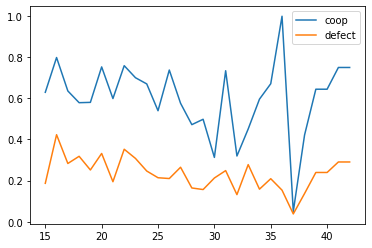

In [23]:
agg_scale = [i for i in range(int(df['C-EATQ_Aggression'].min())+1, int(df['C-EATQ_Aggression'].max()))]
dummy_data_coop = [[agg_scale[i], 1] for i in range(len(agg_scale))]
dummy_data_defect = [[agg_scale[i], 0] for i in range(len(agg_scale))]
pred_coop = regressor.predict(dummy_data_coop)
pred_defect = regressor.predict(dummy_data_defect)

plt.plot(agg_scale, pred_coop, label='coop')
plt.plot(agg_scale, pred_defect, label='defect')
plt.legend()
plt.show()

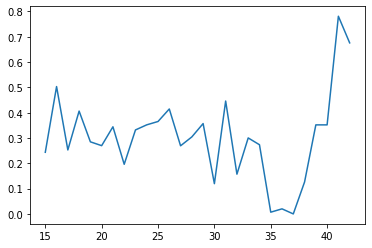

In [26]:
test_forgive = [[agg_scale[i], 0, 0, 1] for i in range(len(agg_scale))]

pred_forgive = regressor2.predict(test_forgive)

plt.plot(agg_scale, pred_forgive)
plt.show()

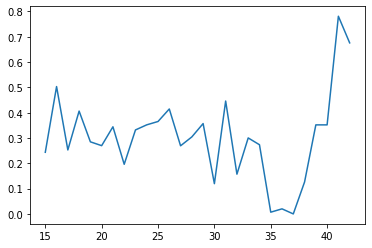

In [27]:
test_forgive2 = [[agg_scale[i], 0, 1, 1] for i in range(len(agg_scale))]

pred_forgive2 = regressor2.predict(test_forgive)

plt.plot(agg_scale, pred_forgive2)
plt.show()

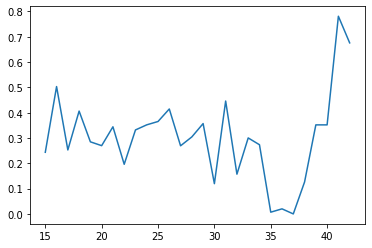

In [30]:
test_forgive3 = [[agg_scale[i], 0, 0, 0] for i in range(len(agg_scale))]

pred_forgive3 = regressor2.predict(test_forgive)

plt.plot(agg_scale, pred_forgive3)
plt.show()

## Measure score vs number of previous partner moves model takes in

[]

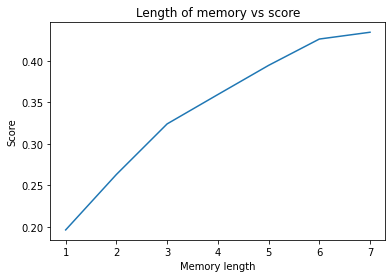

In [60]:
scores_vs_mem = []

max = 8

for i in range(1,max):
    time_series_temp = []

    for j in range(len(df)):
        df_row = df.iloc[j]
        agg = df_row[0]
        for k in range(1+i,df.shape[1]):
            new_row = []
            new_row.append(agg)
            for l in range(i,0,-1):
                if df_row[k-l][1] == 'C':
                    new_row.append(1)
                else:
                    new_row.append(0)
                    
            if df_row[k][0] == 'C':
                new_row.append(1)
            else:
                new_row.append(0)

            time_series_temp.append(new_row)

    cols_temp = ['Agg']
    for j in range(1,i+1):
        cols_temp.append('X'+str(j))
    cols_temp.append('y')

    df_temp = pd.DataFrame(time_series_temp, columns = cols_temp)

    # split into X and y
    X_temp = df_temp.iloc[:, 0:(i+1)].values
    y_temp = df_temp.iloc[:, (i+1)].values

    # split train and test
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1)

    model_temp = RandomForestRegressor(n_estimators=50, random_state=0)
    model_temp.fit(X_train_temp, y_train_temp)
    y_pred_temp = model_temp.predict(X_test_temp)
    scores_vs_mem.append(model_temp.score(X_train_temp, y_train_temp))

plt.plot([i for i in range(1,max)], scores_vs_mem)
plt.title("Length of memory vs score")
plt.xlabel("Memory length")
plt.ylabel("Score")
plt.plot()

## Model 3: Random Forest with Longer Memory and more characteristics

In [41]:
# read data and drop columns
df = pd.read_csv("Blake_RPD_Dataset-1_Twins-03-19-21.csv")

dropCols = [5,12]

for i in range(21,df.shape[1],2):
    dropCols.append(i)

df.drop(df.columns[dropCols],axis=1,inplace=True)

nan_value = float("NaN")
df.replace(" ", nan_value, inplace=True)
df = df.dropna()

In [43]:
time_series3 = []

for i in range(len(df)):
    df_row = df.iloc[i]
    agg = df_row[0]
    for j in range(19,df.shape[1]):
        new_row = []
        new_row.append(agg)
        if df_row[j-1][1] == 'C':
            new_row.append(1)
        else:
            new_row.append(0)
        if df_row[j][0] == 'C':
            new_row.append(1)
        else:
            new_row.append(0)

        time_series3.append(new_row)


print(time_series3[:20])

IndexError: invalid index to scalar variable.